In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

np.random.seed(1729)
plt.rcParams['figure.figsize'] = 15, 8

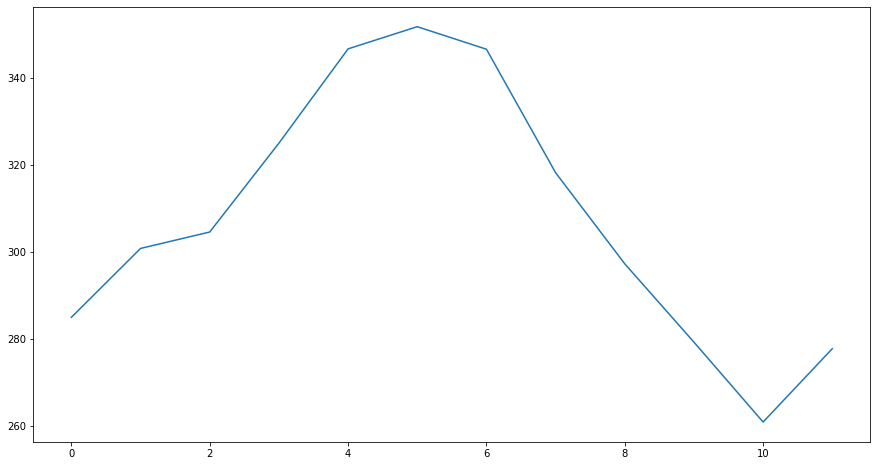

In [2]:
pred = [284.925455, 300.787920, 304.569078, 325.025955, 346.739301, 351.851113,  346.664893,
        318.233748,  297.248124, 279.210739, 260.813104,  277.700654]
plt.plot(pred)

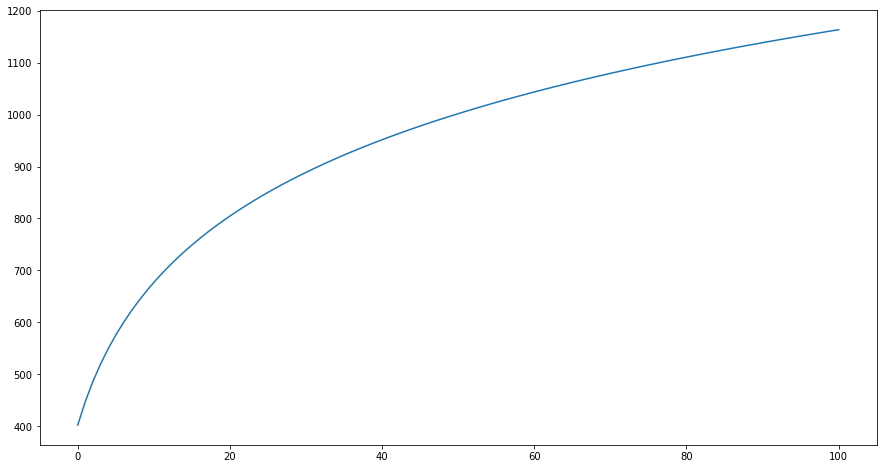

In [3]:
def inventory(x):
    a = 0.2
    return 250 * np.log(x + 5)
inv_level = np.linspace(0, 100, 100)
plt.plot(inv_level, inventory(inv_level))

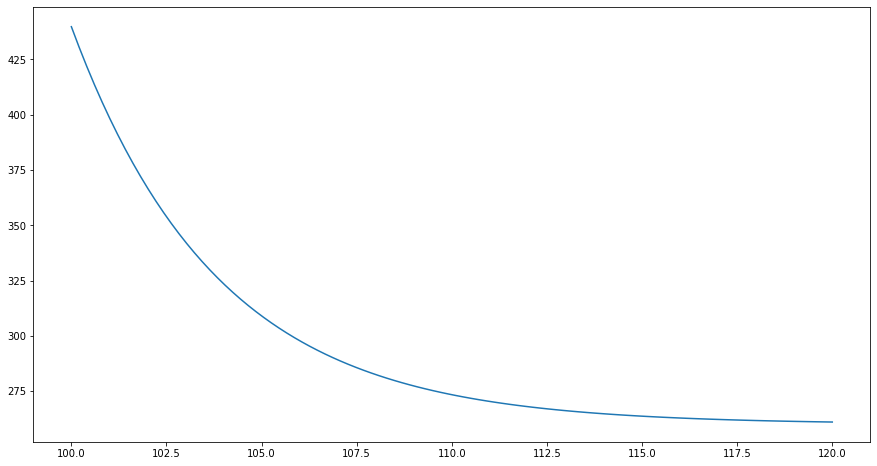

In [4]:
a = 260 #min forecast
b = 352 #max forecast

def elasticity_func(x):
    a = 260 #min forecast
    b = 352 #max forecast
    return b * np.exp(-0.26 * x) * 1e11 + a

pricing_level = np.linspace(100, 120, 100)
plt.plot(pricing_level, elasticity_func(pricing_level))

In [5]:
m = 12    
def obj(x):
    revenue = 0
    for i in range(m):
        sold = min(pred[i], elasticity_func(x[i]))
        storage = inventory(pred[i] - sold)
        revenue_per_m = x[i]*sold - storage 
        revenue += revenue_per_m
    return -revenue

In [6]:
b = (100.0,120.0)
bnds = [b for _ in range(m)]
def constraint(x):
    return [ -sum(elasticity_func(x[:i]) - pred[:i]) for i in range(m)]

cons = [{'type': 'ineq', 'fun': constraint}]
x0 = 100.0 * np.ones(m)

In [7]:
solution = minimize(obj, x0, method='SLSQP', bounds=bnds, options={"maxiter":5000}, constraints=cons )
x = solution.x
x

array([119.99999999, 119.99999999, 119.99999999, 119.99999999,
       102.80446363, 102.58422377, 102.81279418, 119.99999999,
       119.99999999, 119.99999999, 119.99999999, 119.99999999])

In [8]:
solution

     fun: -380266.01581657724
     jac: array([-227.80859375, -228.59765625, -228.7109375 , -229.1015625 ,
       3099.328125  , -351.8515625 , 3067.328125  , -229.00390625,
       -228.4765625 , -227.26171875, -260.81640625, -227.06640625])
 message: 'Optimization terminated successfully'
    nfev: 381
     nit: 24
    njev: 22
  status: 0
 success: True
       x: array([119.99999999, 119.99999999, 119.99999999, 119.99999999,
       102.80446363, 102.58422377, 102.81279418, 119.99999999,
       119.99999999, 119.99999999, 119.99999999, 119.99999999])

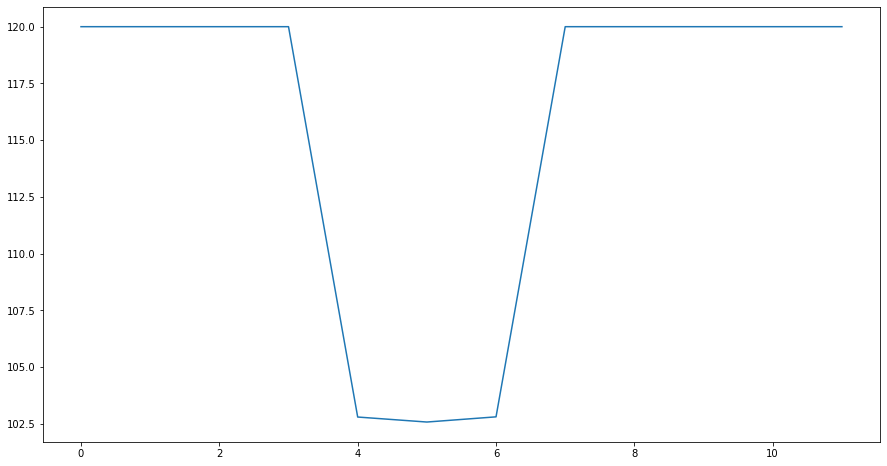

In [9]:
plt.plot(x)